## Feature scaling and vizualization

Standardizing the features (binary variables to 0/1).

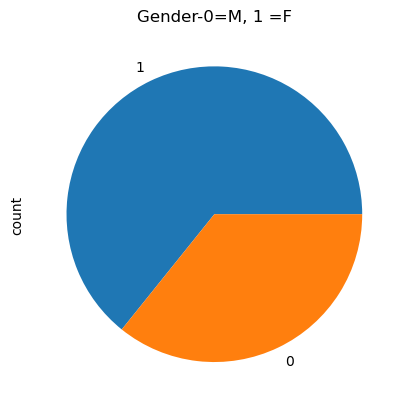

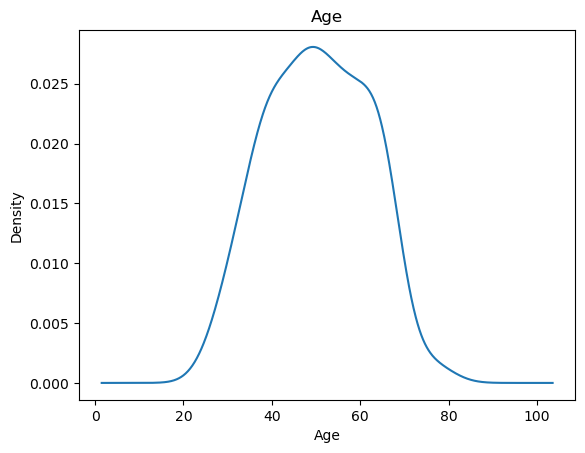

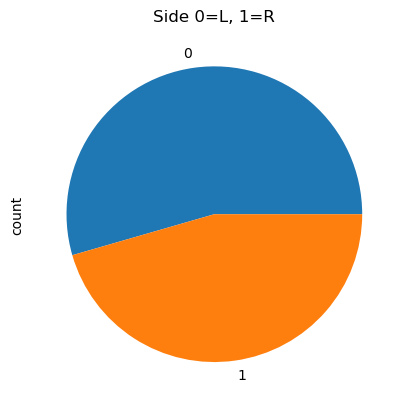

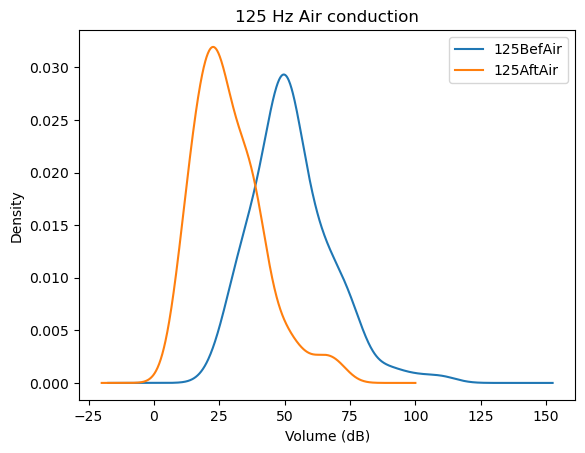

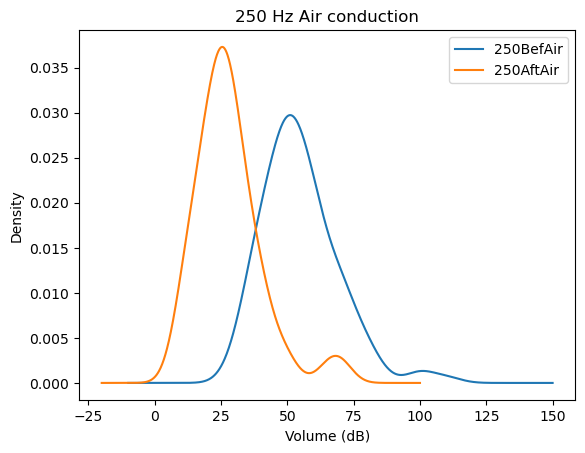

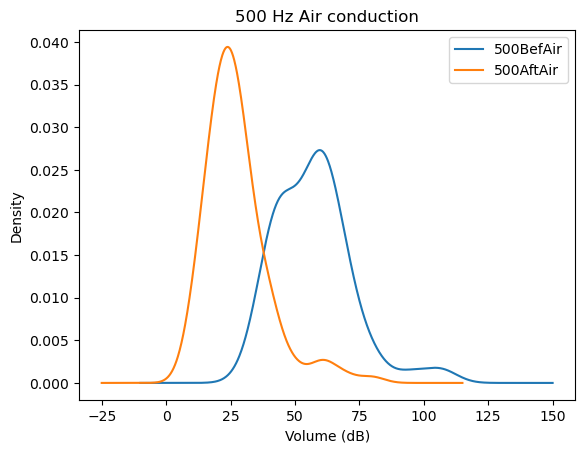

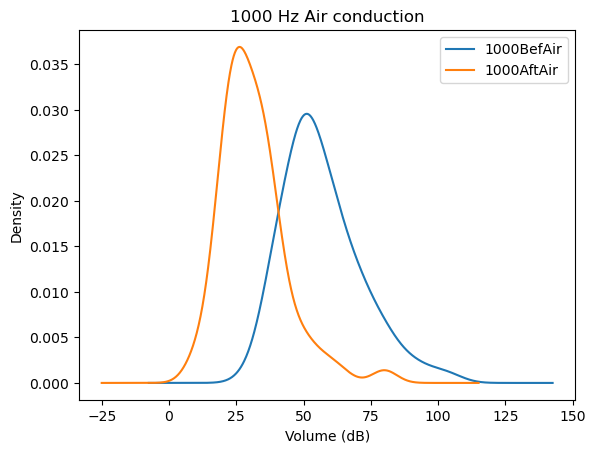

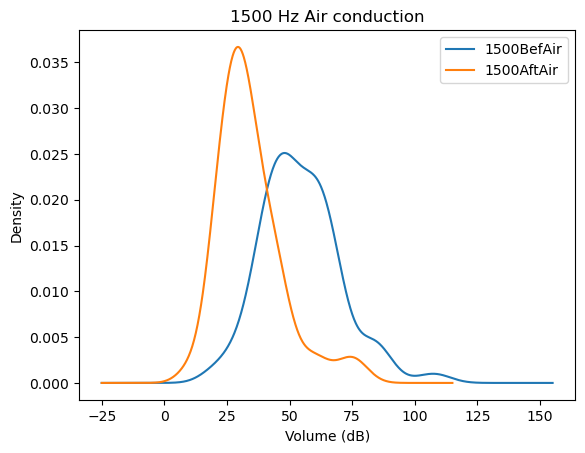

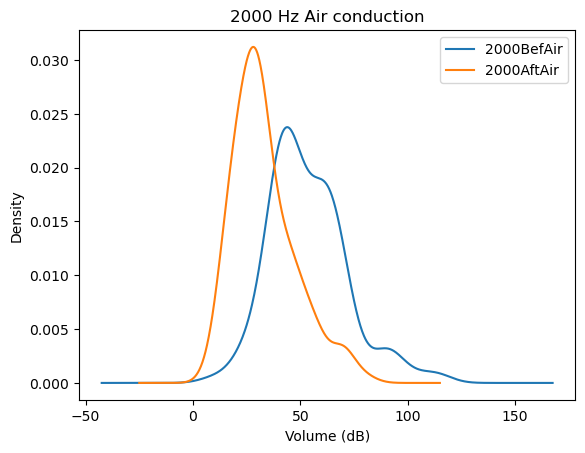

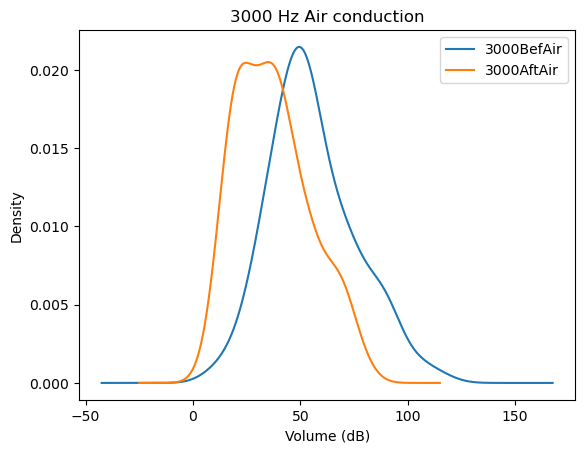

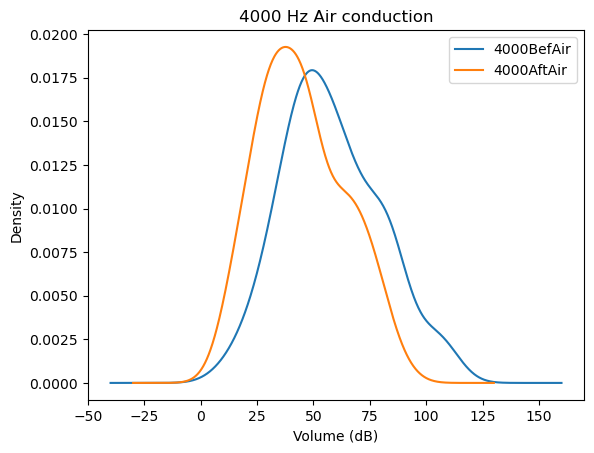

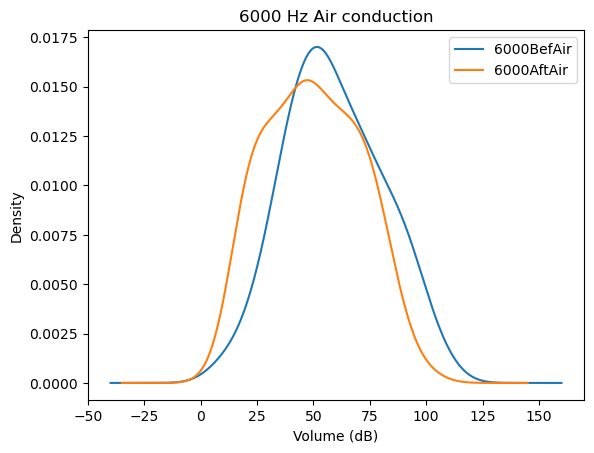

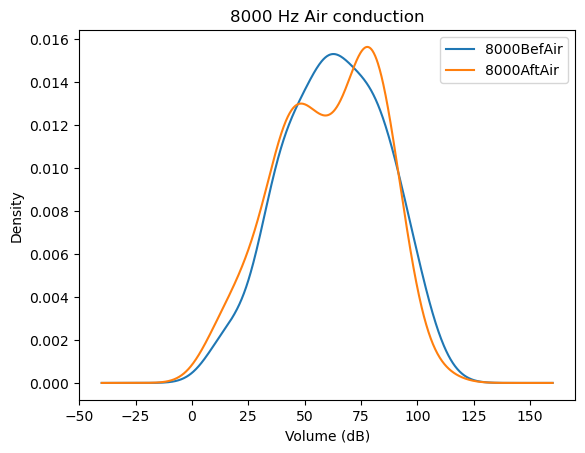

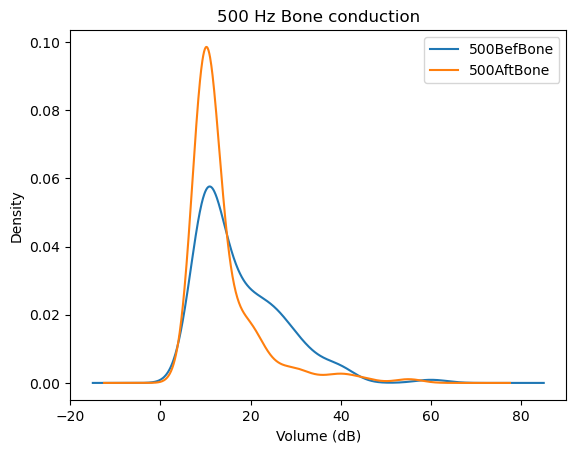

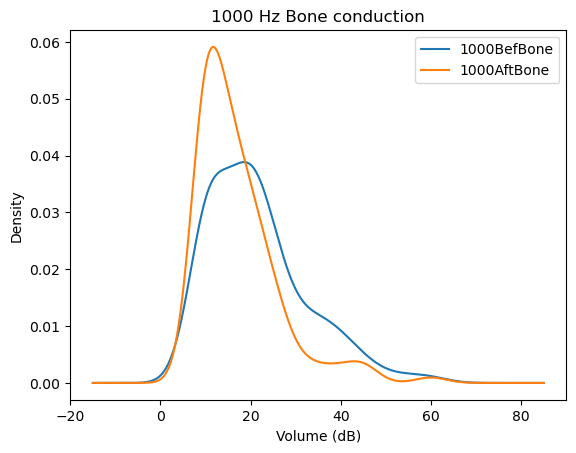

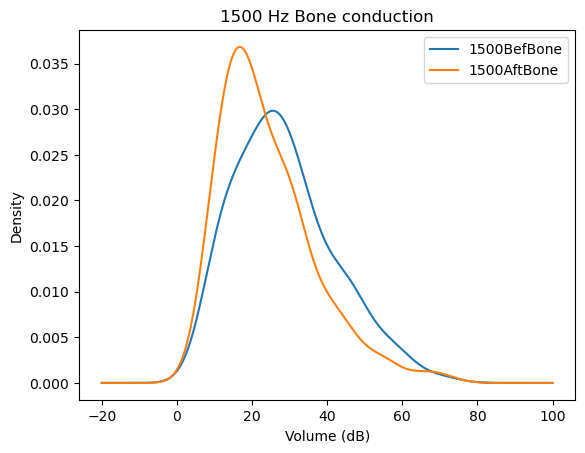

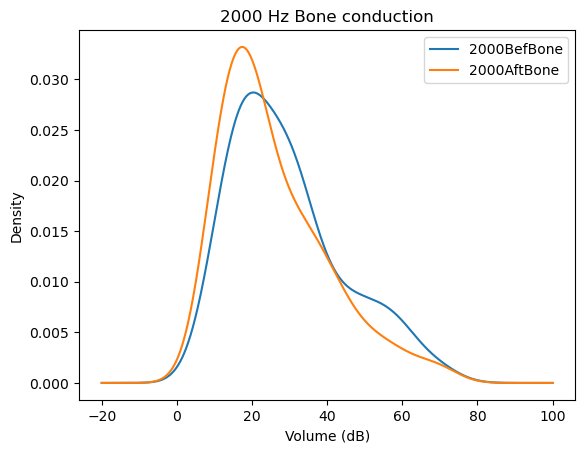

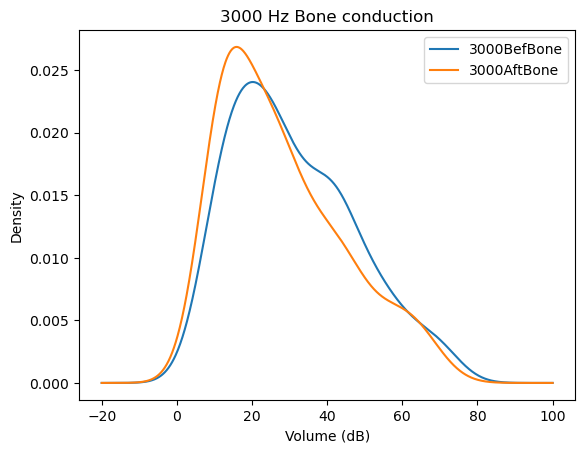

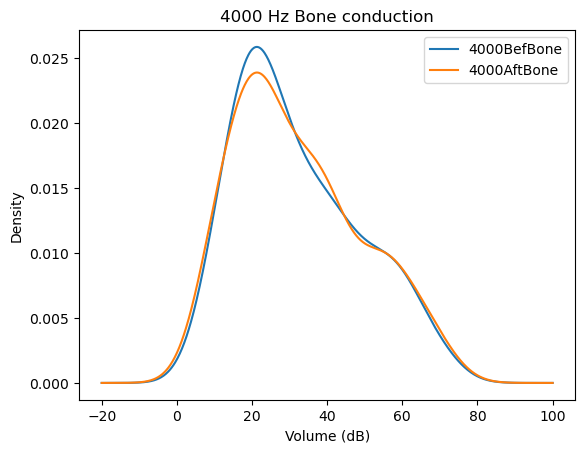

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import funct
import constants
import importlib

importlib.reload(constants)


# load data
adg_data = pd.read_csv('variables/processed.csv')


def extract_title(column):
    freq = ""
    for i in column:
        if(i.isdigit()):
            freq += i
        else:
            break
    freq += " Hz "
    if "Air" in column:
        freq += "Air conduction"
        return freq
    else:
        freq += "Bone conduction"
        return freq

# plot data distributions by using pie charts for binary values or line charts with kernel density estimation smoothing
for i in adg_data.columns:
    if i == "125AftAir":
        break
    pos = adg_data.columns.get_loc(i)
   
    if(pos >= constants.FQ_START_INDEX):
        plt.figure()
        tit = extract_title(i)
        ax = adg_data[i].plot(kind='kde', xlabel='Value',title=tit,legend=True)
        adg_data[adg_data.columns[pos+16]].plot(kind='kde',legend=True)
        
        ax.set_xlabel("Volume (dB)")
    elif(pos < 3):
        plt.figure()
        if(i == 'Age'):
            ax = adg_data[i].plot(kind='kde',title="Age")
            ax.set_xlabel("Age")
        else:
            ax = adg_data[i].value_counts().plot(kind='pie',title=i)

        

    

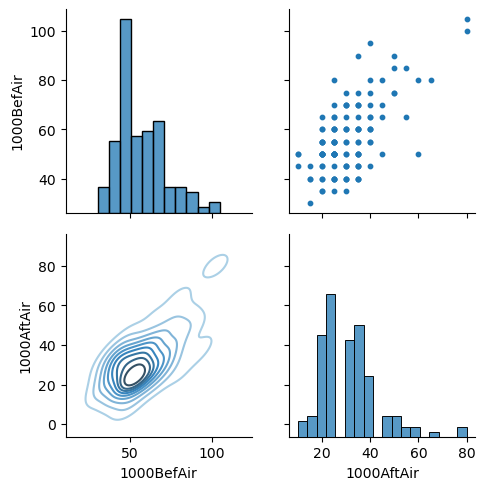

In [2]:
#seaborn library plot
import warnings
# for output readability
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import seaborn as sns

g = sns.PairGrid(adg_data[["1000BefAir","1000AftAir"]], palette=["red"])
g.map_upper(plt.scatter, s=10)
#g.map_upper(hp.annotate)
g.map_diag(sns.histplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

In [3]:
#save changes between features and classes for later analysis
xydifferences = []

for i in range(constants.FQ_START_INDEX,constants.FQ_START_INDEX + 16):
    x = adg_data.iloc[:,i]
    y = adg_data.iloc[:,i+16]


    xydifferences.append(np.mean(np.abs(x - y)))
  
print(xydifferences)


[24.715447154471544, 27.195121951219512, 30.040650406504064, 25.772357723577237, 20.447154471544714, 20.853658536585368, 18.821138211382113, 16.178861788617887, 14.878048780487806, 12.235772357723578, 4.796747967479675, 5.203252032520325, 6.788617886178862, 6.382113821138211, 5.691056910569106, 5.203252032520325]


## Standardization 


In [4]:
#compute feature means and standard deviations for export
feature_means = np.zeros(constants.FEATURES_NUM)
feature_means[1] = adg_data['Age'].mean()
feature_stds = np.zeros(constants.FEATURES_NUM)
feature_stds[1] = adg_data['Age'].std()
feature_means[2] = 0
feature_stds[2] = 1

# standardize age
adg_data['Age'] = (adg_data['Age'] - adg_data['Age'].mean()) / adg_data['Age'].std()
adg_data['Age']


0      0.852637
1     -0.901114
2     -1.076489
3      0.501886
4      1.378762
         ...   
118    0.852637
119   -0.813427
120    0.326511
121    1.378762
122    1.028012
Name: Age, Length: 123, dtype: float64

In [5]:
for i in range(3,constants.FEATURES_NUM):
    print(adg_data.iloc[:,i].name)
    #compute column means and standard deviations
    feature_means[i] = adg_data.iloc[:, i].mean()
    feature_stds[i] = adg_data.iloc[:, i].std()
    # standardize
    adg_data.iloc[:, i] = (adg_data.iloc[:, i] -adg_data.iloc[:, i].mean()) / adg_data.iloc[:, i].std()


## Save data here
savedata = True
if savedata:
    funct.save_np(feature_means,'variables/feature_means',savedata)
    funct.save_np(feature_stds,'variables/feature_stds',savedata)
    funct.save_pickle(xydifferences, 'variables/xydifferences',savedata)

    adg_data.to_csv('variables/scaled.csv',index=False)


Air mean
Bone mean
Bone/Air
Bone*Air
125_250BA
500_1000BA
1500_2000BA
3000_4000BA
6000_8000BA
500_1000BB
1500_2000BB
3000_4000BB
ABG
125BefAir
250BefAir
500BefAir
1000BefAir
1500BefAir
2000BefAir
3000BefAir
4000BefAir
6000BefAir
8000BefAir
500BefBone
1000BefBone
1500BefBone
2000BefBone
3000BefBone
4000BefBone
